<a href="https://colab.research.google.com/github/Ruthmwaura/module_2_core_week_1_ip/blob/main/Game_prediction(Mchezopesa).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#GAME RESULT PREDICTION
**Defining the question**

**a) Specifying the Data Analytic Question**

A prediction of results of a game between team 1 and team 2, based on who's home and who's away, and on whether or not the game is friendly.

**b) Defining the Metric for Success**

Success will be pegged on the ability to create a model that has high accuracy on predicting the results of a team based on who's home and who's away, and on whether or not the game is friendly.

**c) Understanding the context**

FIFA exists to govern football and to develop the game around the world.The teams of the men's member nations of FIFA, football's world governing body, are ranked based on their game results with the most successful teams being ranked highest. The rankings were introduced in December 1992.A points system is used, with points being awarded based on the results of all FIFA-recognised full international matches.

FIFA has devised a formula for calculating the number of points a team can gain from a single match (P), which is dependent on the following factors:

Was the match won or drawn? (M)
How important was the match? (I)
How strong was the opposing team and the confederation to which they belong? (T & C)
So the formula is as follows: P = M x I x T x C

Calculating 'M'
Teams gain three points for a win, one point for a draw and zero for a defeat. In the case of a penalty shoot-out, the winning team gains two points and the losing team gets one point.

Calculating 'I'
The importance of a match is rated from 1 to 4 and depends on whether it is a friendly (1), a competitive World Cup or confederation-level qualifier (2.5), a confederation-level finals game (3) or a World Cup game (4).


Calculating 'T'
In order to calculate the strength of the opposing team, FIFA uses the following: 200 minus the opposition team's ranking position (using the most recent ranking). So, for example, based on the September 2017 ranking, third-place Portugal would have a strength rating of 197.

However, there are exceptions; the team at the top of the ranking is always assigned a rating of 200, while teams ranked 150 and below are assigned a minimum value of 50.

Calculating 'C'
The strength of a confederation takes into account the number of victories from its teams in the last three World Cup finals competitions.

The current values are below:

Confederation	  Weight

CONMEBOL	      1.00

UEFA	          0.99

AFC	            0.85

CAF           	0.85

OFC	            0.85

CONCACAF	      0.85

For games between teams from different confederations, the mean value of the two confederations is used.

For confederations that have not had teams qualify for the World Cup, the weight of the weakest confederation is used.


**d) Recording the Experimental Design**

To successfully conduct this project the following steps will be taken in order:

-Business understanding

-Data understanding

-Data preparation

-explanatory data analysis

-modelling 

-evaluation

-challenging solution

**e)Data appropriateness** 

The data have variables that will adequately give answers to the analytical question.

In [78]:
##importing libraries
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
import scipy as sp
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split,GridSearchCV,RandomizedSearchCV,KFold,StratifiedKFold,cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.metrics import mean_squared_error,r2_score,accuracy_score,f1_score,classification_report
from sklearn.metrics import confusion_matrix
from sklearn import metrics
import requests
from io import StringIO
import datetime as dt
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline


In [79]:
##loading data
from google.colab import drive
drive.mount('/content/drive')

# Accessing the working directory
os.chdir('/content/drive/MyDrive/datasets wk 1 core')

ranking=pd.read_csv('fifa_ranking.csv')
results=pd.read_csv('results.csv')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


##Understanding Data

In [80]:
#previewing dataset1
ranking.head()

,rank,country_full,country_abrv,total_points,previous_points,rank_change,cur_year_avg,cur_year_avg_weighted,last_year_avg,last_year_avg_weighted,two_year_ago_avg,two_year_ago_weighted,three_year_ago_avg,three_year_ago_weighted,confederation,rank_date
0,1,Germany,GER,0.0,57,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,UEFA,1993-08-08
1,2,Italy,ITA,0.0,57,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,UEFA,1993-08-08
2,3,Switzerland,SUI,0.0,50,9,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,UEFA,1993-08-08
3,4,Sweden,SWE,0.0,55,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,UEFA,1993-08-08
4,5,Argentina,ARG,0.0,51,5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,CONMEBOL,1993-08-08


In [81]:
ranking.tail()

,rank,country_full,country_abrv,total_points,previous_points,rank_change,cur_year_avg,cur_year_avg_weighted,last_year_avg,last_year_avg_weighted,two_year_ago_avg,two_year_ago_weighted,three_year_ago_avg,three_year_ago_weighted,confederation,rank_date
57788,206,Anguilla,AIA,0.0,0,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,CONCACAF,2018-06-07
57789,206,Bahamas,BAH,0.0,0,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,CONCACAF,2018-06-07
57790,206,Eritrea,ERI,0.0,0,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,CAF,2018-06-07
57791,206,Somalia,SOM,0.0,0,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,CAF,2018-06-07
57792,206,Tonga,TGA,0.0,0,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,OFC,2018-06-07


In [82]:
#let's see number of columns and rows
print("The ranking dataframe has "  +  str(ranking.shape[1])   +   " columns and " + str(ranking.shape[0])  +   " rows.")

The ranking dataframe has 16 columns and 57793 rows.


In [83]:
#checking for null values and the datatype
ranking.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 57793 entries, 0 to 57792
Data columns (total 16 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   rank                     57793 non-null  int64  
 1   country_full             57793 non-null  object 
 2   country_abrv             57793 non-null  object 
 3   total_points             57793 non-null  float64
 4   previous_points          57793 non-null  int64  
 5   rank_change              57793 non-null  int64  
 6   cur_year_avg             57793 non-null  float64
 7   cur_year_avg_weighted    57793 non-null  float64
 8   last_year_avg            57793 non-null  float64
 9   last_year_avg_weighted   57793 non-null  float64
 10  two_year_ago_avg         57793 non-null  float64
 11  two_year_ago_weighted    57793 non-null  float64
 12  three_year_ago_avg       57793 non-null  float64
 13  three_year_ago_weighted  57793 non-null  float64
 14  confederation         

In [84]:
#checking the statistical data
ranking.describe()

,rank,total_points,previous_points,rank_change,cur_year_avg,cur_year_avg_weighted,last_year_avg,last_year_avg_weighted,two_year_ago_avg,two_year_ago_weighted,three_year_ago_avg,three_year_ago_weighted
count,57793.000000,57793.000000,57793.000000,57793.000000,57793.000000,57793.000000,57793.000000,57793.000000,57793.000000,57793.000000,57793.000000,57793.000000
mean,101.628086,122.068637,332.302926,-0.009897,61.798602,61.798602,61.004602,30.502377,59.777462,17.933277,59.173916,11.834811
std,58.618424,260.426863,302.872948,5.804309,138.014883,138.014883,137.688204,68.844143,136.296079,40.888849,135.533343,27.106675
min,1.000000,0.000000,0.000000,-72.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,51.000000,0.000000,56.000000,-2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,101.000000,0.000000,272.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,152.000000,92.790000,525.000000,1.000000,32.250000,32.250000,26.660000,13.330000,21.500000,6.450000,21.250000,4.250000
max,209.000000,1775.030000,1920.000000,92.000000,1158.660000,1158.660000,1169.570000,584.790000,1159.710000,347.910000,1200.770000,240.150000


In [85]:
##previewing dataset2
results.head()


,date,home_team,away_team,home_score,away_score,tournament,city,country,neutral
0,1872-11-30,Scotland,England,0,0,Friendly,Glasgow,Scotland,False
1,1873-03-08,England,Scotland,4,2,Friendly,London,England,False
2,1874-03-07,Scotland,England,2,1,Friendly,Glasgow,Scotland,False
3,1875-03-06,England,Scotland,2,2,Friendly,London,England,False
4,1876-03-04,Scotland,England,3,0,Friendly,Glasgow,Scotland,False


In [86]:
results.tail()

,date,home_team,away_team,home_score,away_score,tournament,city,country,neutral
40834,2019-07-18,American Samoa,Tahiti,8,1,Pacific Games,Apia,Samoa,True
40835,2019-07-18,Fiji,Solomon Islands,4,4,Pacific Games,Apia,Samoa,True
40836,2019-07-19,Senegal,Algeria,0,1,African Cup of Nations,Cairo,Egypt,True
40837,2019-07-19,Tajikistan,North Korea,0,1,Intercontinental Cup,Ahmedabad,India,True
40838,2019-07-20,Papua New Guinea,Fiji,1,1,Pacific Games,Apia,Samoa,True


In [87]:
#let's see number of columns and rows
print("The results dataframe has "  +  str(results.shape[1])   +   " columns and " + str(results.shape[0])  +   " rows.")

The results dataframe has 9 columns and 40839 rows.


In [88]:
#let's see the datatypes
results.dtypes

date          object
home_team     object
away_team     object
home_score     int64
away_score     int64
tournament    object
city          object
country       object
neutral         bool
dtype: object

The datatype of all columns are in expected datatype expect the date column.

In [89]:
#let's see the nulls
results.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40839 entries, 0 to 40838
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   date        40839 non-null  object
 1   home_team   40839 non-null  object
 2   away_team   40839 non-null  object
 3   home_score  40839 non-null  int64 
 4   away_score  40839 non-null  int64 
 5   tournament  40839 non-null  object
 6   city        40839 non-null  object
 7   country     40839 non-null  object
 8   neutral     40839 non-null  bool  
dtypes: bool(1), int64(2), object(6)
memory usage: 2.5+ MB


In [90]:
#lets preview the statistical data
results.describe()

,home_score,away_score
count,40839.000000,40839.000000
mean,1.745709,1.188105
std,1.749145,1.405120
min,0.000000,0.000000
25%,1.000000,0.000000
50%,1.000000,1.000000
75%,2.000000,2.000000
max,31.000000,21.000000


##Preparing Data

###DATASET 1

###validity

In [91]:
#dropping unnecessary columns
ranking.drop(['country_abrv',	'total_points','previous_points','rank_change','cur_year_avg','cur_year_avg_weighted','last_year_avg','last_year_avg_weighted','two_year_ago_avg','two_year_ago_weighted','three_year_ago_avg','three_year_ago_weighted'], axis='columns', inplace=True)

###consistency

In [92]:
ranking.duplicated().any()

True

In [93]:
#dropping duplicates
ranking.drop_duplicates(subset=None, keep='first', inplace=True)

In [94]:
ranking.duplicated().any()

False

In [95]:
#checking for outliers
numerical_data= ranking.select_dtypes(include='int64')

Q1 = numerical_data.quantile(0.25)
Q3 = numerical_data.quantile(0.75)
IQR = Q3 - Q1

(numerical_data < (Q1 - 1.5 * IQR)) |(numerical_data > (Q3 + 1.5 * IQR))

,rank
0,False
1,False
2,False
3,False
4,False
...,...
57788,False
57789,False
57790,False
57791,False


In [96]:
print(list(ranking['rank'].unique()))
print(list(ranking['rank_date'].unique()))
print(list(ranking['country_full'].unique()))
print(list(ranking['confederation'].unique()))

[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146, 148, 149, 150, 151, 152, 153, 154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 147, 168, 169, 170, 171, 172, 173, 174, 176, 175, 177, 178, 179, 180, 181, 182, 183, 184, 185, 186, 187, 188, 189, 190, 191, 192, 193, 194, 195, 196, 197, 198, 199, 200, 201, 202, 203, 204, 205, 207, 206, 208, 209]
['1993-08-08', '1993-09-23', '1993-10-22', '1993-11-19', '1993

###DATASET 2

###Validity

In [97]:
#dropping unneccesary columns
results.drop(['city'],axis='columns', inplace=True)

results.head()

,date,home_team,away_team,home_score,away_score,tournament,country,neutral
0,1872-11-30,Scotland,England,0,0,Friendly,Scotland,False
1,1873-03-08,England,Scotland,4,2,Friendly,England,False
2,1874-03-07,Scotland,England,2,1,Friendly,Scotland,False
3,1875-03-06,England,Scotland,2,2,Friendly,England,False
4,1876-03-04,Scotland,England,3,0,Friendly,Scotland,False


###Consistency

In [98]:
#let's check for duplicates
results.duplicated().any()

False

There are no duplicates.

###uniformity

In [99]:
numerical_data= results.select_dtypes(include='int64')

Q1 = numerical_data.quantile(0.25)
Q3 = numerical_data.quantile(0.75)
IQR = Q3 - Q1

(numerical_data < (Q1 - 1.5 * IQR)) |(numerical_data > (Q3 + 1.5 * IQR))

,home_score,away_score
0,False,False
1,True,False
2,False,False
3,False,False
4,False,False
...,...,...
40834,True,False
40835,True,False
40836,False,False
40837,False,False


We have some outliers.

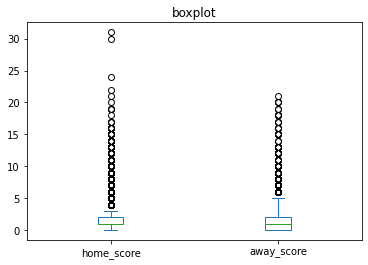

In [100]:
#plotting a boxplot to visualize the outliers
ax = results[['home_score', 'away_score']].plot(kind='box', title='boxplot')

plt.show()


In [101]:
outliers= results[results['home_score'] > 20]
outliers

,date,home_team,away_team,home_score,away_score,tournament,country,neutral
7893,1971-09-13,Tahiti,Cook Islands,30,0,South Pacific Games,French Polynesia,False
10931,1979-08-30,Fiji,Kiribati,24,0,South Pacific Games,Fiji,False
23778,2001-04-09,Australia,Tonga,22,0,FIFA World Cup qualification,Australia,False
23781,2001-04-11,Australia,American Samoa,31,0,FIFA World Cup qualification,Australia,False
28815,2006-11-24,Sápmi,Monaco,21,1,Viva World Cup,France,True


We will not be dropping the outliers, they are relevant to the study.

###MERGING THE TWO DATASETS

In [102]:
#changing the datatype of date column on both datasets
ranking['rank_date'] = pd.to_datetime(ranking['rank_date'])
results['date'] = pd.to_datetime(results['date'])

In [103]:
#Creating a year and month column from the datetime object

ranking['year'] = ranking.rank_date.dt.year
results['year'] = results.date.dt.year

ranking['month'] = ranking.rank_date.dt.month
results['month'] = results.date.dt.month



In [104]:
#merging the two datasets
game= pd.merge(results, ranking, how = 'left', left_on = ['year', 'month'], right_on = ['year', 'month'])

game.head()


,date,home_team,away_team,home_score,away_score,tournament,country,neutral,year,month,rank,country_full,confederation,rank_date
0,1872-11-30,Scotland,England,0,0,Friendly,Scotland,False,1872,11,NaN,NaN,NaN,NaT
1,1873-03-08,England,Scotland,4,2,Friendly,England,False,1873,3,NaN,NaN,NaN,NaT
2,1874-03-07,Scotland,England,2,1,Friendly,Scotland,False,1874,3,NaN,NaN,NaN,NaT
3,1875-03-06,England,Scotland,2,2,Friendly,England,False,1875,3,NaN,NaN,NaN,NaT
4,1876-03-04,Scotland,England,3,0,Friendly,Scotland,False,1876,3,NaN,NaN,NaN,NaT


In [105]:
game.tail()

,date,home_team,away_team,home_score,away_score,tournament,country,neutral,year,month,rank,country_full,confederation,rank_date
4310804,2019-07-18,American Samoa,Tahiti,8,1,Pacific Games,Samoa,True,2019,7,NaN,NaN,NaN,NaT
4310805,2019-07-18,Fiji,Solomon Islands,4,4,Pacific Games,Samoa,True,2019,7,NaN,NaN,NaN,NaT
4310806,2019-07-19,Senegal,Algeria,0,1,African Cup of Nations,Egypt,True,2019,7,NaN,NaN,NaN,NaT
4310807,2019-07-19,Tajikistan,North Korea,0,1,Intercontinental Cup,India,True,2019,7,NaN,NaN,NaN,NaT
4310808,2019-07-20,Papua New Guinea,Fiji,1,1,Pacific Games,Samoa,True,2019,7,NaN,NaN,NaN,NaT


In [106]:
#Selecting the ranking details of the home team only
home = game[game.home_team == game.country_full]
home.head()

,date,home_team,away_team,home_score,away_score,tournament,country,neutral,year,month,rank,country_full,confederation,rank_date
17928,1993-08-01,Colombia,Paraguay,0,0,FIFA World Cup qualification,Colombia,False,1993,8,19.0,Colombia,CONMEBOL,1993-08-08
18146,1993-08-01,Peru,Argentina,0,1,FIFA World Cup qualification,Peru,False,1993,8,70.0,Peru,CONMEBOL,1993-08-08
18265,1993-08-01,Uruguay,Ecuador,0,0,FIFA World Cup qualification,Uruguay,False,1993,8,22.0,Uruguay,CONMEBOL,1993-08-08
18504,1993-08-01,Venezuela,Brazil,1,5,FIFA World Cup qualification,Venezuela,False,1993,8,94.0,Venezuela,CONMEBOL,1993-08-08
18635,1993-08-07,Senegal,Zambia,0,0,FIFA World Cup qualification,Ivory Coast,True,1993,8,58.0,Senegal,CAF,1993-08-08


In [107]:
#renaming the rank column to obtaing the home team_rank
home = home.rename({'rank': 'home_team_rank'}, axis = 1)
home.head(5)

,date,home_team,away_team,home_score,away_score,tournament,country,neutral,year,month,home_team_rank,country_full,confederation,rank_date
17928,1993-08-01,Colombia,Paraguay,0,0,FIFA World Cup qualification,Colombia,False,1993,8,19.0,Colombia,CONMEBOL,1993-08-08
18146,1993-08-01,Peru,Argentina,0,1,FIFA World Cup qualification,Peru,False,1993,8,70.0,Peru,CONMEBOL,1993-08-08
18265,1993-08-01,Uruguay,Ecuador,0,0,FIFA World Cup qualification,Uruguay,False,1993,8,22.0,Uruguay,CONMEBOL,1993-08-08
18504,1993-08-01,Venezuela,Brazil,1,5,FIFA World Cup qualification,Venezuela,False,1993,8,94.0,Venezuela,CONMEBOL,1993-08-08
18635,1993-08-07,Senegal,Zambia,0,0,FIFA World Cup qualification,Ivory Coast,True,1993,8,58.0,Senegal,CAF,1993-08-08


In [108]:
# Selecting the ranking details of the away team only
away = game[game.away_team == game.country_full]
away.head()

,date,home_team,away_team,home_score,away_score,tournament,country,neutral,year,month,rank,country_full,confederation,rank_date
17976,1993-08-01,Colombia,Paraguay,0,0,FIFA World Cup qualification,Colombia,False,1993,8,67.0,Paraguay,CONMEBOL,1993-08-08
18081,1993-08-01,Peru,Argentina,0,1,FIFA World Cup qualification,Peru,False,1993,8,5.0,Argentina,CONMEBOL,1993-08-08
18278,1993-08-01,Uruguay,Ecuador,0,0,FIFA World Cup qualification,Uruguay,False,1993,8,35.0,Ecuador,CONMEBOL,1993-08-08
18418,1993-08-01,Venezuela,Brazil,1,5,FIFA World Cup qualification,Venezuela,False,1993,8,8.0,Brazil,CONMEBOL,1993-08-08
18602,1993-08-07,Senegal,Zambia,0,0,FIFA World Cup qualification,Ivory Coast,True,1993,8,25.0,Zambia,CAF,1993-08-08


In [109]:
#renaming the rank column to obtaing the away_team_rank
away= away.rename({'rank': 'away_team_rank'}, axis = 1)
away.head(5)

,date,home_team,away_team,home_score,away_score,tournament,country,neutral,year,month,away_team_rank,country_full,confederation,rank_date
17976,1993-08-01,Colombia,Paraguay,0,0,FIFA World Cup qualification,Colombia,False,1993,8,67.0,Paraguay,CONMEBOL,1993-08-08
18081,1993-08-01,Peru,Argentina,0,1,FIFA World Cup qualification,Peru,False,1993,8,5.0,Argentina,CONMEBOL,1993-08-08
18278,1993-08-01,Uruguay,Ecuador,0,0,FIFA World Cup qualification,Uruguay,False,1993,8,35.0,Ecuador,CONMEBOL,1993-08-08
18418,1993-08-01,Venezuela,Brazil,1,5,FIFA World Cup qualification,Venezuela,False,1993,8,8.0,Brazil,CONMEBOL,1993-08-08
18602,1993-08-07,Senegal,Zambia,0,0,FIFA World Cup qualification,Ivory Coast,True,1993,8,25.0,Zambia,CAF,1993-08-08


In [110]:
#merging the away and home datasets
game_df = pd.merge(home, away, how = 'inner', left_on = ['year', 'month','away_team'], right_on = ['year', 'month','away_team'])
game_df.head()

,date_x,home_team_x,away_team,home_score_x,away_score_x,tournament_x,country_x,neutral_x,year,month,...,home_team_y,home_score_y,away_score_y,tournament_y,country_y,neutral_y,away_team_rank,country_full_y,confederation_y,rank_date_y
0,1993-08-01,Colombia,Paraguay,0,0,FIFA World Cup qualification,Colombia,False,1993,8,...,Colombia,0,0,FIFA World Cup qualification,Colombia,False,67.0,Paraguay,CONMEBOL,1993-08-08
1,1993-08-01,Colombia,Paraguay,0,0,FIFA World Cup qualification,Colombia,False,1993,8,...,Argentina,0,0,FIFA World Cup qualification,Argentina,False,67.0,Paraguay,CONMEBOL,1993-08-08
2,1993-08-29,Argentina,Paraguay,0,0,FIFA World Cup qualification,Argentina,False,1993,8,...,Colombia,0,0,FIFA World Cup qualification,Colombia,False,67.0,Paraguay,CONMEBOL,1993-08-08
3,1993-08-29,Argentina,Paraguay,0,0,FIFA World Cup qualification,Argentina,False,1993,8,...,Argentina,0,0,FIFA World Cup qualification,Argentina,False,67.0,Paraguay,CONMEBOL,1993-08-08
4,1993-08-01,Peru,Argentina,0,1,FIFA World Cup qualification,Peru,False,1993,8,...,Peru,0,1,FIFA World Cup qualification,Peru,False,5.0,Argentina,CONMEBOL,1993-08-08


In [111]:
game_df.isnull().sum()

date_x             0
home_team_x        0
away_team          0
home_score_x       0
away_score_x       0
tournament_x       0
country_x          0
neutral_x          0
year               0
month              0
home_team_rank     0
country_full_x     0
confederation_x    0
rank_date_x        0
date_y             0
home_team_y        0
home_score_y       0
away_score_y       0
tournament_y       0
country_y          0
neutral_y          0
away_team_rank     0
country_full_y     0
confederation_y    0
rank_date_y        0
dtype: int64

In [112]:
#dropping unneccesary columns
game_df=game_df.drop(['date_y','home_team_y', 'home_score_y', 'away_score_y', 'tournament_y',
       'country_y', 'neutral_y', 'confederation_y', 'rank_date_y','rank_date_x','country_full_y'], axis=1)
game_df.head()

,date_x,home_team_x,away_team,home_score_x,away_score_x,tournament_x,country_x,neutral_x,year,month,home_team_rank,country_full_x,confederation_x,away_team_rank
0,1993-08-01,Colombia,Paraguay,0,0,FIFA World Cup qualification,Colombia,False,1993,8,19.0,Colombia,CONMEBOL,67.0
1,1993-08-01,Colombia,Paraguay,0,0,FIFA World Cup qualification,Colombia,False,1993,8,19.0,Colombia,CONMEBOL,67.0
2,1993-08-29,Argentina,Paraguay,0,0,FIFA World Cup qualification,Argentina,False,1993,8,5.0,Argentina,CONMEBOL,67.0
3,1993-08-29,Argentina,Paraguay,0,0,FIFA World Cup qualification,Argentina,False,1993,8,5.0,Argentina,CONMEBOL,67.0
4,1993-08-01,Peru,Argentina,0,1,FIFA World Cup qualification,Peru,False,1993,8,70.0,Peru,CONMEBOL,5.0


feature engineering


In [113]:
#creating a column to show how the game ended, was it a win, lose or draw for the home team

game_df['final_score'] = game_df['home_score_x'] - game_df['away_score_x']
def home_team_x(home_score_x):
    if home_score_x > 0:
        return 'Win'
    elif home_score_x < 0:
        return 'Loss'
    else:
        return 'Draw'
      
game_df['outcome'] = game_df.final_score.apply(lambda h:home_team_x(h))
game_df.head(5)

,date_x,home_team_x,away_team,home_score_x,away_score_x,tournament_x,country_x,neutral_x,year,month,home_team_rank,country_full_x,confederation_x,away_team_rank,final_score,outcome
0,1993-08-01,Colombia,Paraguay,0,0,FIFA World Cup qualification,Colombia,False,1993,8,19.0,Colombia,CONMEBOL,67.0,0,Draw
1,1993-08-01,Colombia,Paraguay,0,0,FIFA World Cup qualification,Colombia,False,1993,8,19.0,Colombia,CONMEBOL,67.0,0,Draw
2,1993-08-29,Argentina,Paraguay,0,0,FIFA World Cup qualification,Argentina,False,1993,8,5.0,Argentina,CONMEBOL,67.0,0,Draw
3,1993-08-29,Argentina,Paraguay,0,0,FIFA World Cup qualification,Argentina,False,1993,8,5.0,Argentina,CONMEBOL,67.0,0,Draw
4,1993-08-01,Peru,Argentina,0,1,FIFA World Cup qualification,Peru,False,1993,8,70.0,Peru,CONMEBOL,5.0,-1,Loss


In [114]:
#checking entries in the column created
game_df['outcome'].unique()

array(['Draw', 'Loss', 'Win'], dtype=object)

##EDA Analysis

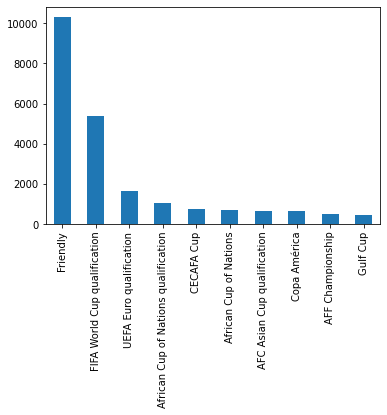

In [115]:
#Plotting a bar graph of tournament

game_df['tournament_x'].value_counts().head(10).plot.bar()

majority of the games played from the data were friendly matches

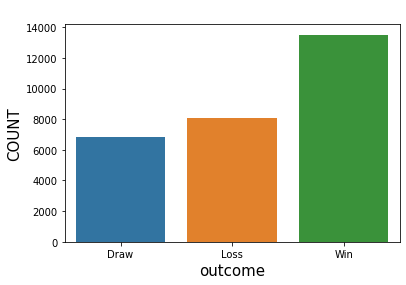

In [116]:
# Plotting a bar graph for the outcome

sns.countplot('outcome',data = game_df)
plt.xlabel("outcome",fontsize=15)
plt.ylabel("COUNT",fontsize=15)
plt.title("Countplot of outcome",fontsize=16,color="white")
plt.show()

in many games the home team won

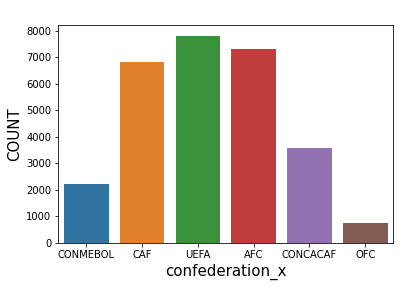

In [117]:
# Plotting a bar graph for the confederation

sns.countplot('confederation_x',data = game_df)
plt.xlabel("confederation_x",fontsize=15)
plt.ylabel("COUNT",fontsize=15)
plt.title("Countplot of confederation_x",fontsize=16,color="white")
plt.show()

most of thee matches were organized by uefa and ofc organized the least

###Check of multicollinearity

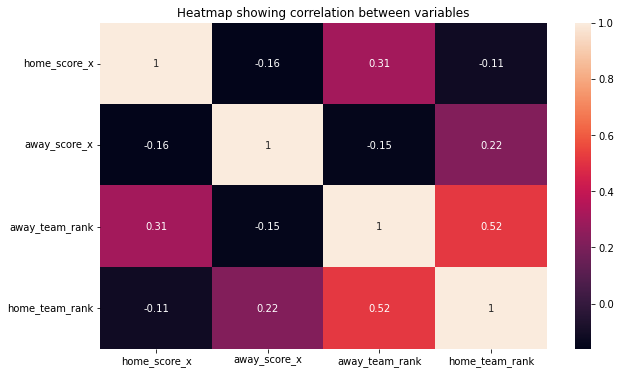

In [118]:
#Checking for correlations between features
data=game_df[['home_score_x','away_score_x','away_team_rank',	'home_team_rank']]
plt.figure(figsize = (10, 6))
sns.heatmap(data.corr(), annot = True) 
plt.title('Heatmap showing correlation between variables')
plt.show()

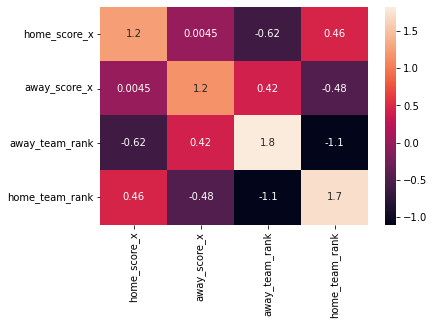

In [119]:
#computing the VIF(which is the inverse of the correlation matrix)
corr=data.corr()
VIF_df = pd.DataFrame(np.linalg.inv(corr.values), index = corr.index, columns = corr.columns)
sns.heatmap(VIF_df, annot = True)
plt.show()

from the vif scores there is very little multi-collinearity

##polynomial regression

In [120]:
#selecting columns relevant for answering the question
data=game_df[['home_score_x','away_score_x','tournament_x','home_team_rank','away_team_rank']]

home score predicton model

In [121]:
#dividing data into target variable and independent variables
x=data.drop(['home_score_x','away_score_x'],axis=1)
y=data['home_score_x'].values

In [122]:
# #gettingdummies for categorical columns
# x = pd.get_dummies(x, drop_first=True).values.reshape(-1,1)
x.head()

#encoding the tournament 
x['tournament_x'] =x['tournament_x'].astype('category')

x['tournament_x'] =x['tournament_x'].cat.codes
x

,tournament_x,home_team_rank,away_team_rank
0,26,19.0,67.0
1,26,19.0,67.0
2,26,5.0,67.0
3,26,5.0,67.0
4,26,70.0,5.0
...,...,...,...
28434,25,48.0,5.0
28435,25,7.0,5.0
28436,25,7.0,5.0
28437,25,61.0,8.0


In [123]:
#polynomial regression
#we start by determining the degree of the polynomial
poly = PolynomialFeatures(degree=10, include_bias=False)

#creating new features
poly_features = poly.fit_transform(x)

In [124]:
#dividing into train and test set
x_train, x_test, y_train, y_test = train_test_split(poly_features, y, test_size=0.2, random_state=1)

#training the model
regressor = LinearRegression()
regressor.fit(x_train, y_train)

LinearRegression()

In [125]:
#predicting
y_pred = regressor.predict(x_test)


In [126]:
#creating a comparison table
comparison_frame = pd.DataFrame({'Actual': y_test.flatten(), 'Predicted': y_pred.flatten()})
comparison_frame


,Actual,Predicted
0,0,0.862053
1,6,3.255849
2,0,1.995300
3,1,0.582703
4,1,2.525027
...,...,...
5683,0,1.193861
5684,1,1.505316
5685,2,2.335064
5686,2,0.986898


In [127]:
#creating the residual by substracting the y_test value from the y_predicted 
# value for each row in our dataset

residuals = np.subtract(y_pred, y_test)


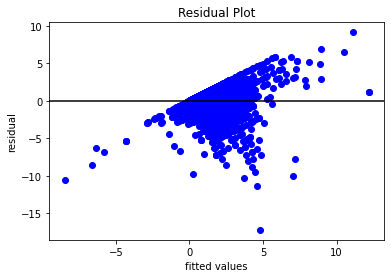

In [128]:
# Plotting the prediction errors

plt.scatter(y_pred, residuals, color='blue')
plt.title('Residual Plot')
plt.ylabel('residual')
plt.xlabel('fitted values')
plt.axhline(y= residuals.mean(), color='black')
plt.show()

In [129]:
from sklearn.metrics import mean_squared_error, f1_score, accuracy_score, confusion_matrix
# Let's describe our residual:
pd.DataFrame(residuals).describe()
print("The RMSE score for the model : ", np.sqrt(mean_squared_error(y_test, y_pred)))
print("The residual mean score for the model : ", residuals.mean())

The RMSE score for the model :  1.5729302538712229
The residual mean score for the model :  -0.035171730037816734


The RMSE score for the model is quite high compared to the mean hence low predictive capability

####cross validation

In [130]:
from sklearn.model_selection import KFold


folds = KFold(n_splits = 10)

print("We are using",str(folds.get_n_splits(x)),'folds')

RMSE = []
count = 1
for train_index,test_index in folds.split(x):
  print("Training Model", str(count))

  poly_reg = PolynomialFeatures(degree = 1)
  x_poly = poly_reg.fit_transform(x)

  x_train,x_test = x_poly[train_index],x_poly[test_index]
  y_train,y_test = y[train_index],y[test_index]

  LinReg = LinearRegression()
  LinReg.fit( x_train, y_train)

  # Make Predictions
  y_pred = LinReg.predict(x_test)

  # Calculate RMSE
  rmse = np.sqrt(metrics.mean_squared_error(y_test,y_pred))
  RMSE.append(rmse)

  print("Model",str(count),"has a RMSE of ", rmse)
  count = count + 1

We are using 10 folds
Training Model 1
Model 1 has a RMSE of  1.3069408640732398
Training Model 2
Model 2 has a RMSE of  1.6644483795312428
Training Model 3
Model 3 has a RMSE of  1.9524357233289156
Training Model 4
Model 4 has a RMSE of  1.4605398207332079
Training Model 5
Model 5 has a RMSE of  1.3538227758741144
Training Model 6
Model 6 has a RMSE of  1.4333478116747058
Training Model 7
Model 7 has a RMSE of  1.351625518369511
Training Model 8
Model 8 has a RMSE of  1.3592555329062639
Training Model 9
Model 9 has a RMSE of  1.3094180524993428
Training Model 10
Model 10 has a RMSE of  1.3735358212831885


the RMSE value for the third model is fairly larger than the RMSE we found initially, it couldbe most of the outlietrs are in this model

the best model wouldbe model 6

####Heteroscedacity

In [131]:
#Testing Heteroscedacity using the Bartletts Test

import scipy as sp

test_result, p_value = sp.stats.bartlett(y_pred, residuals)

# To interpret the results we must also compute a critical value of the chi squared distribution
degree_of_freedom = len(y_pred)-1
probability = 1 - p_value

critical_value = sp.stats.chi2.ppf(probability, degree_of_freedom)
print(critical_value)

if (test_result > critical_value):
  print('the variances are unequal, and the model should be reassessed')
else:
  print('the variances are homogeneous!')

inf
the variances are homogeneous!


away score prediction model

In [132]:
#dividing data into target variable and independent variables
x=data.drop(['away_score_x','home_score_x'],axis=1)
y=data['away_score_x'].values

In [135]:
x.head()

#changing datatype of the tournament 
x['tournament_x'] =x['tournament_x'].astype('category')



In [136]:
#encoding the categorical column
x['tournament_x'] =x['tournament_x'].cat.codes
x


,tournament_x,home_team_rank,away_team_rank
0,26,19.0,67.0
1,26,19.0,67.0
2,26,5.0,67.0
3,26,5.0,67.0
4,26,70.0,5.0
...,...,...,...
28434,25,48.0,5.0
28435,25,7.0,5.0
28436,25,7.0,5.0
28437,25,61.0,8.0


In [138]:
#polynomial regression
#we start by determining the degree of the polynomial
poly = PolynomialFeatures(degree=10, include_bias=False)

#creating new features
poly_features = poly.fit_transform(x)

In [139]:
#dividing into train and test set
x_train, x_test, y_train, y_test = train_test_split(poly_features, y, test_size=0.2, random_state=1)

#training the model
regressor = LinearRegression()
regressor.fit(x_train, y_train)

LinearRegression()

In [140]:
#predicting
y_predc = regressor.predict(x_test)

In [141]:
#creating a comparison table
comparison_frame = pd.DataFrame({'Actual': y_test.flatten(), 'Predicted': y_predc.flatten()})
comparison_frame


,Actual,Predicted
0,1,1.432164
1,2,0.333177
2,0,1.186141
3,4,1.672231
4,1,0.793423
...,...,...
5683,1,0.988163
5684,1,1.457319
5685,0,0.540129
5686,1,0.178825


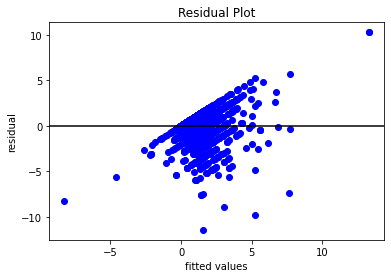

In [142]:
#creating the residual by substracting the y_test value from the y_predicted 
# value for each row in our dataset

residuals1 = np.subtract(y_predc, y_test)

# Plotting the prediction errors

plt.scatter(y_predc, residuals1, color='blue')
plt.title('Residual Plot')
plt.ylabel('residual')
plt.xlabel('fitted values')
plt.axhline(y= residuals.mean(), color='black')
plt.show()

In [143]:
from sklearn.metrics import mean_squared_error, f1_score, accuracy_score, confusion_matrix
# Let's describe our residual:
pd.DataFrame(residuals1).describe()
print("The RMSE score for the model : ", np.sqrt(mean_squared_error(y_test, y_predc)))
print("The residual mean score for the model : ", residuals.mean())

The RMSE score for the model :  1.2492187213344488
The residual mean score for the model :  -0.035171730037816734


also for this model RMSE score for the model is quite high compared to the mean hence low predictive capability

####cross validation

In [144]:
from sklearn.model_selection import KFold


folds = KFold(n_splits = 10)

print("We are using",str(folds.get_n_splits(x)),'folds')

RMSE = []
count = 1
for train_index,test_index in folds.split(x):
  print("Training Model", str(count))

  poly_reg = PolynomialFeatures(degree = 1)
  x_poly = poly_reg.fit_transform(x)

  x_train,x_test = x_poly[train_index],x_poly[test_index]
  y_train,y_test = y[train_index],y[test_index]

  LinReg = LinearRegression()
  LinReg.fit( x_train, y_train)

  # Make Predictions
  y_predc = LinReg.predict(x_test)

  # Calculate RMSE
  rmse = np.sqrt(metrics.mean_squared_error(y_test,y_predc))
  RMSE.append(rmse)

  print("Model",str(count),"has a RMSE of ", rmse)
  count = count + 1

We are using 10 folds
Training Model 1
Model 1 has a RMSE of  1.1830959357998214
Training Model 2
Model 2 has a RMSE of  1.1779056458323642
Training Model 3
Model 3 has a RMSE of  1.2471853521606031
Training Model 4
Model 4 has a RMSE of  1.2300588124718126
Training Model 5
Model 5 has a RMSE of  1.177984750766001
Training Model 6
Model 6 has a RMSE of  1.23903399976053
Training Model 7
Model 7 has a RMSE of  1.1582800798365651
Training Model 8
Model 8 has a RMSE of  1.2011074374046755
Training Model 9
Model 9 has a RMSE of  1.123907150311916
Training Model 10
Model 10 has a RMSE of  1.0887260075723988


the RMSE value for model 3,4 and 6 is fairly larger than the RMSE we found initially, it couldbe most of the outlietrs are in this model

the best model wouldbe model 2

####Heteroscedacity

In [145]:
#Testing Heteroscedacity using the Bartletts Test

import scipy as sp

test_result, p_value = sp.stats.bartlett(y_predc, residuals1)

# To interpret the results we must also compute a critical value of the chi squared distribution
degree_of_freedom = len(y_pred)-1
probability = 1 - p_value

critical_value = sp.stats.chi2.ppf(probability, degree_of_freedom)
print(critical_value)

if (test_result > critical_value):
  print('the variances are unequal, and the model should be reassessed')
else:
  print('the variances are homogeneous!')

inf
the variances are homogeneous!


##logistic regression

In [146]:
# Selecting the relevant columns for the logistic regression model
data1 = game_df[['home_team_x','away_team','home_score_x','away_score_x','tournament_x','home_team_rank','away_team_rank','outcome']]

In [147]:
# Spliting the data into independent variables and the target variable
x = data1.drop(['outcome','home_score_x','away_score_x'],axis = 1)
y = data1['outcome'].values

#Encoding the categorical features

x = pd.get_dummies(x, drop_first=True)

#Spliting the data into train and test sets
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.25, random_state = 101)

#training the model
logistic = LogisticRegression()
logistic.fit(x_train, y_train)

#Making predictions
y_pred = logistic.predict(x_test)

# Measuring the accuracy of the model
print(f'The accuracy of the model is {accuracy_score(y_test, y_pred)}')
print(f'The f1 score of the model is {f1_score(y_test, y_pred, average = "macro")}')
confusion_matrix(y_test, y_pred)
    

The accuracy of the model is 0.5729957805907173
The f1 score of the model is 0.4746412873106614


array([[ 190,  550, 1044],
       [ 145, 1163,  677],
       [ 136,  484, 2721]])

####hyperparameter tuning

In [148]:
# Scaling the Data
from sklearn.preprocessing import StandardScaler
feature_scaler = StandardScaler()
x_train = feature_scaler.fit_transform(x_train)
x_test = feature_scaler.transform(x_test)

In [150]:
#Train the Data and Cross Validation
LogReg = LogisticRegression()

from sklearn.model_selection import cross_val_score
all_accuracies = cross_val_score(estimator=LogReg, X=x_train, y=y_train, cv=5)

print(all_accuracies)
print(all_accuracies.mean())

[0.59423347 0.58298172 0.59306142 0.58884201 0.5880422 ]
0.5894321632538203


In [151]:
# Hyperparameters

penalty = ['l1','l2']
C = np.logspace(0,8,20)

hyperparameters  = dict(C=C, penalty = penalty)

In [154]:
clf = RandomizedSearchCV(LogReg, hyperparameters, random_state=1, n_iter=100, cv=5, verbose=0, n_jobs=-1)


In [155]:
# Best Model
best_model = clf.fit(x_train,y_train)

In [156]:
# Viewing best hyperparameters
print('Best Penalty:', best_model.best_estimator_.get_params()['penalty'])
print('Best C:', best_model.best_estimator_.get_params()['C'])

Best Penalty: l2
Best C: 1.0


In [157]:
# The best accuracy achieved
best_accuracy = best_model.best_score_
best_accuracy

0.5894321632538203

Accuracy has improved from 57.29% to 58.94% by using HyperParameter Tuning

The Accuracy however is doesn't increase significantly

##Challenging the solution
In the Logistic Approach  the Accuracy hasn't improved from Hyperparemeter Tuning

I would therefore recommend use of more independent variables.

Another Classifier Algorithm could be used to compare the level of accuracy

##Follow up questions

- Did we have the right data?
- Do we need other data to answer our question?
- Did we have the right question?